In [3]:
# ========================================
# 1. Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier  # Chosen algorithm

sns.set_theme(style='whitegrid')


In [7]:
# ========================================
# 2. Load Dataset
# ========================================
df = pd.read_csv('./dataset/bank/bank.csv')  # Adjust path if needed
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
df.shape

(11162, 17)

In [5]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
# ========================================
# 3. Exploratory Data Analysis (EDA)
# ========================================
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

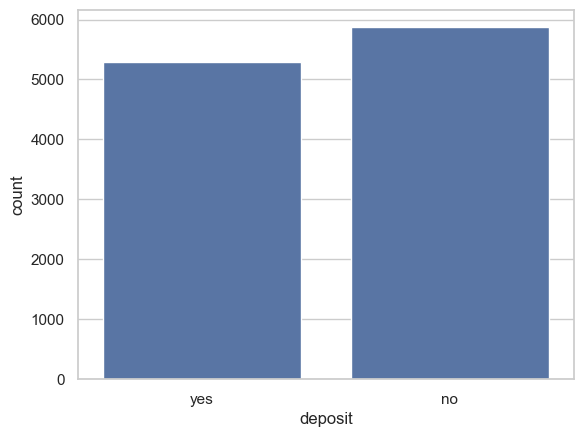

In [13]:
# Visualize target distribution
sns.countplot(x='deposit', data=df)
plt.show()

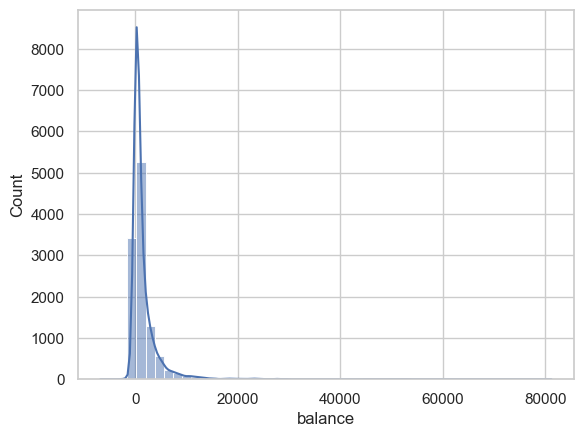

In [14]:
# Visualize balance distribution
sns.histplot(df['balance'], bins=50, kde=True)
plt.show()

In [11]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [16]:
# ========================================
# 4. Preprocessing
# ========================================

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values if any (none expected)
# df.fillna(method='ffill', inplace=True)

# Define features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [19]:
# ========================================
# 5. Train/Test Split
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [21]:

# ========================================
# 6. Model Training
# ========================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:

# ========================================
# 7. Prediction & Evaluation
# ========================================
y_pred = model.predict(X_test)


In [25]:
print(confusion_matrix(y_test, y_pred))
print("classification_report")


[[982 193]
 [135 923]]
classification_report


In [24]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.87      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233

Accuracy: 0.8531124048365427


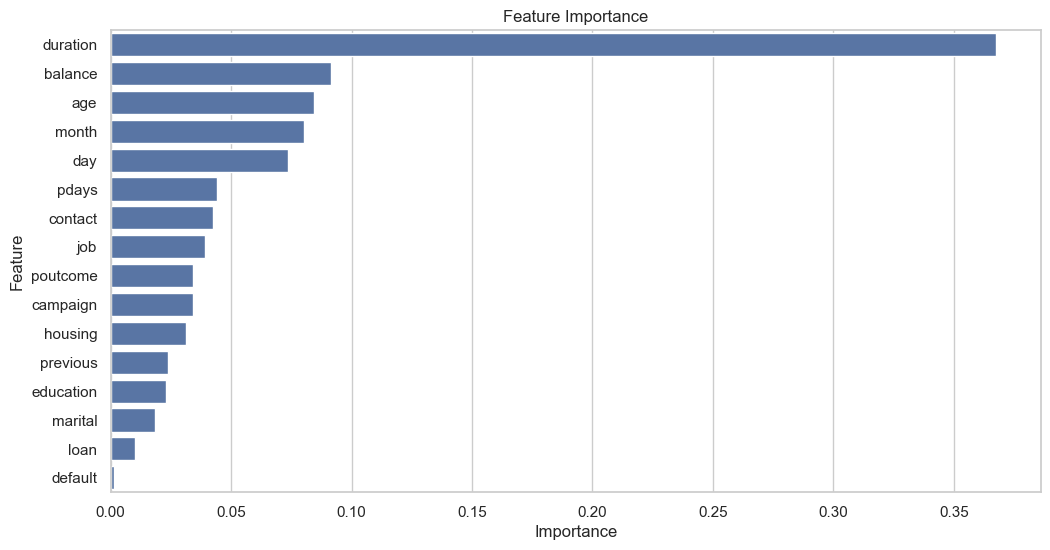

In [13]:
# ========================================
# 8. Feature Importance (Optional)
# ========================================
importances = model.feature_importances_
feature_names = df.drop('deposit', axis=1).columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance')
plt.show()

# ========================================
# 9. Conclusion
# ========================================
# You can summarize performance here manually or print observations


# 🧠 Model Evaluation Report

## 📉 Confusion Matrix

|              | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| **Actual 0** | 982         | 193         |
| **Actual 1** | 135         | 923         |

---

## 📊 Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.88      | 0.84   | 0.86     | 1175    |
| 1     | 0.83      | 0.87   | 0.85     | 1058    |

---

## 📦 Overall Metrics

| Metric            | Value  |
|-------------------|--------|
| Accuracy          | 0.8531 |
| Macro Avg F1      | 0.85   |
| Weighted Avg F1   | 0.85   |
| Total Support     | 2233   |

---

> **Note:** The model performs well with a balanced F1 score across both classes and an overall accuracy of 85.31%.


In [14]:
!jupyter nbconvert --to python banking.ipynb --TemplateExporter.exclude_input_prompt=True


[NbConvertApp] Converting notebook banking.ipynb to python
[NbConvertApp] Writing 3235 bytes to banking.py
